# Geometry


In [21]:
import pandas as pd
import numpy as np
%matplotlib inline  
pd.options.display.max_rows=20

In [22]:
boys = pd.read_csv("boys.csv", index_col=0)
girls = pd.read_csv("girls.csv", index_col=0)

## Each name lives on the unit-simplex

## Each name can be projected to the unit-sphere

## We compute the Bhattacharyya angle (e.g. correlation)

In [23]:
# project to unit-simplex
def proj_simplex(ts):
    return ts.fillna(0)/ts.sum()
    
# project to unit-sphere 
def proj_sphere(ts):
    return np.sqrt(proj_simplex(ts))

In [24]:
def match(body1, body2):
    if isinstance(body1, pd.Series):
        body1 = body1.to_frame()
    if isinstance(body2, pd.Series):
        body2 = body2.to_frame()
    x = body1.apply(proj_sphere)
    y = body2.apply(proj_sphere)
    x = pd.DataFrame({key : x[key].dot(y) for key in x.keys()}).stack().sort_values()
    x.index.names = ["Name A", "Name B"]
    return x

In [25]:
match(boys["Thomas"], girls)

Name A     Name B
Vreneli    Thomas    0.123203
Malea      Thomas    0.139364
Berthe     Thomas    0.188331
Käthe      Thomas    0.201503
Aloisia    Thomas    0.206416
Norah      Thomas    0.208344
Alea       Thomas    0.213282
Elea       Thomas    0.215213
Hulda      Thomas    0.217644
Ela        Thomas    0.220429
                       ...   
Bettina    Thomas    0.982457
Isabel     Thomas    0.983305
Patrizia   Thomas    0.984941
Cristina   Thomas    0.986265
Franziska  Thomas    0.987189
Claudia    Thomas    0.987475
Daniela    Thomas    0.987561
Patricia   Thomas    0.989455
Sabina     Thomas    0.990225
Isabelle   Thomas    0.996147
Length: 1001, dtype: float64

In [26]:
match(boys, boys["Urs"])

Name A  Name B       
Urs     Ajan             0.021155
        Lean             0.029118
        Lio              0.029173
        Timéo            0.032286
        Lian             0.034533
        Mael             0.042842
        Fynn             0.043329
        Erion            0.047851
        Dion             0.051394
        Arda             0.053064
                           ...   
        Jean-Michel      0.981985
        Norbert          0.983432
        Jean-François    0.985148
        Rolf             0.985743
        Jean-Marc        0.987643
        Jörg             0.989443
        Roland           0.989977
        Beat             0.991063
        Jürg             0.996088
        Urs              1.000000
Length: 1001, dtype: float64

In [27]:
match(boys, girls)
# Ruth is amazing!

Name A    Name B 
Blerta    Erhard     0.000000
Ingeborg  Ensar      0.000000
Bluette   Silas      0.000000
Ingeborg  Endrit     0.000000
          Emre       0.000000
Gilberte  Maël       0.000000
Käthe     Burim      0.000000
Ingeborg  Eliott     0.000000
Käthe     Bujar      0.000000
Ingeborg  Eliot      0.000000
                       ...   
Ruth      Werner     0.995554
Doris     Rolf       0.995772
Ruth      Josef      0.995815
          Hans       0.995819
Mirjam    Michael    0.995975
Isabelle  Thomas     0.996147
Ruth      Alfred     0.996206
Marianne  Peter      0.996891
Ursula    Ulrich     0.996977
Ruth      Walter     0.997695
Length: 1002001, dtype: float64

In [28]:
def pair_plot(ts1, ts2, project=True):
    if project:
        ts1 = proj_simplex(ts1)
        ts2 = proj_simplex(ts2)
    print(match(ts1, ts2))
    pd.concat((ts1,ts2), axis=1).plot()

Name A  Name B
Lydia   Thomas    0.748791
dtype: float64


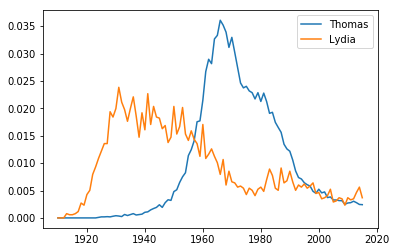

In [29]:
pair_plot(boys["Thomas"], girls["Lydia"], project=True)

Name A  Name B
Rachel  Chris     0.827544
dtype: float64


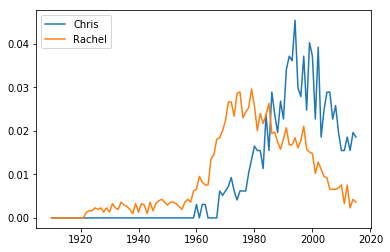

In [30]:
pair_plot(boys["Chris"], girls["Rachel"], project=True)

Name A     Name B
Christian  Chris     0.632565
dtype: float64


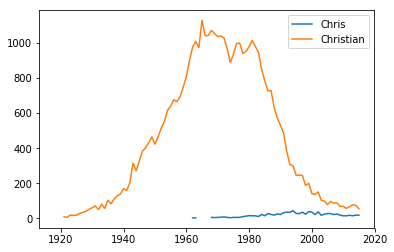

In [31]:
pair_plot(boys["Chris"], boys["Christian"], project=False)

Name A  Name B
Beat    Urs       0.991063
dtype: float64


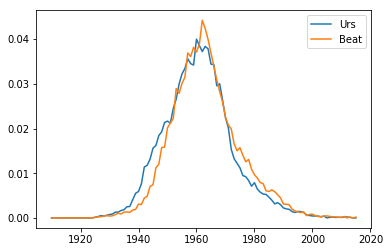

In [32]:
pair_plot(boys["Urs"], boys["Beat"], project=True)

Name A  Name B
Ruth    Walter    0.997695
dtype: float64


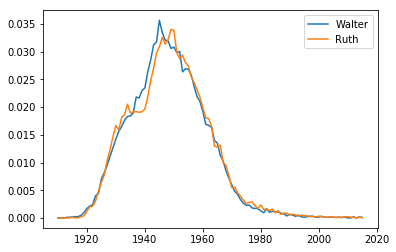

In [33]:
pair_plot(boys["Walter"], girls["Ruth"])

In [34]:
match(boys["Thomas"],girls).mean()

0.7234260956505042

In [35]:
# which girl has the best matching with the boys, e.g. we match each girl against all boys and compute the mean
# for each girl across the boys. A high number indicates that the girl would be very compatible
match(boys,girls).reset_index().groupby(by="Name A")[0].mean().sort_values()

Name A
Vreneli       0.170455
Berthe        0.215745
Hulda         0.237297
Aloisia       0.238164
Käthe         0.241385
Malea         0.252634
Bluette       0.267430
Bertha        0.274112
Lucette       0.290371
Elisabetha    0.293597
                ...   
Maya          0.792857
Ana           0.792865
Marion        0.793192
Francesca     0.793199
Milena        0.793310
Vera          0.794323
Gloria        0.794494
Carolina      0.794808
Ilona         0.795513
Adriana       0.801120
Name: 0, Length: 1001, dtype: float64

In [36]:
match(girls, boys).reset_index().groupby(by="Name A")[0].mean().sort_values()

Name A
Ajan         0.225084
Lean         0.266956
Lio          0.272504
Timéo        0.284905
Lian         0.288557
Mael         0.317395
Fynn         0.323696
Arda         0.331538
Erion        0.333526
Nevio        0.333839
               ...   
Marius       0.768938
Adriano      0.769962
Alexander    0.770116
Toni         0.770331
Victor       0.771111
Filippo      0.771237
Antoine      0.771631
Denis        0.771950
Etienne      0.772518
Lorenz       0.774115
Name: 0, Length: 1001, dtype: float64